# Project 7 

## Problem Statement

In this project, we will combine 3 datasets that contain cancelation, delay, and other operational and categorical data to understand what factors are causing flight delays at the nation's airports.


### Loading python libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn.cluster as cluster

import matplotlib.pyplot as plt
import seaborn as sns
import renders as rs
from IPython.display import display

%matplotlib inline

pd.set_option("display.max_columns", 999)
pd.set_option("display.max_rows", 999)

### Loading and examining the data sets

In [2]:
airport_cancellations_df = pd.read_csv("./assets/airport_cancellations.csv")
airport_cancellations_df = airport_cancellations_df.dropna() 
airport_cancellations_df[:3]

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004.0,242.0,235.0,71.0,46.0
1,ABQ,2005.0,221.0,190.0,61.0,33.0
2,ABQ,2006.0,392.0,329.0,71.0,124.0


In [3]:
airport_cancellations_df.shape

(805, 6)

In [4]:
airport_cancellations_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805 entries, 0 to 804
Data columns (total 6 columns):
Airport                    805 non-null object
Year                       805 non-null float64
Departure Cancellations    805 non-null float64
Arrival Cancellations      805 non-null float64
Departure Diversions       805 non-null float64
Arrival Diversions         805 non-null float64
dtypes: float64(5), object(1)
memory usage: 44.0+ KB


In [5]:
airport_cancellations_df.describe()

,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
count,805.000000,805.000000,805.000000,805.000000,805.000000
mean,2008.986335,1292.038509,1333.124224,173.315528,169.413665
std,3.158116,1835.961943,1975.224868,172.345539,228.521615
min,2004.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,349.000000,314.000000,62.000000,41.000000
50%,2009.000000,663.000000,642.000000,110.000000,84.000000
75%,2012.000000,1472.000000,1523.000000,236.000000,190.000000
max,2014.000000,16618.000000,17571.000000,1064.000000,1948.000000


In [6]:
# Finding the unique values for airport_cancellations

cancellations_header = airport_cancellations_df.columns.tolist()
cancellations_uniques = [(column, airport_cancellations_df[column].nunique()) for column in cancellations_header]
cancellations_uniques

[('Airport', 74),
 ('Year', 11),
 ('Departure Cancellations', 676),
 ('Arrival Cancellations', 660),
 ('Departure Diversions', 353),
 ('Arrival Diversions', 340)]

`airport_cancellations_df` Summary Takeaways

- 11 years of flight departure and arrival cancellations and diversions data by airport

In [7]:
airport_operations_df = pd.read_csv("./assets/airport_operations.csv")
airport_operations_df = airport_operations_df.dropna() 
airport_operations_df[:3]

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82


In [8]:
airport_operations_df.shape

(841, 15)

In [9]:
airport_operations_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 841 entries, 0 to 840
Data columns (total 15 columns):
airport                               841 non-null object
year                                  841 non-null int64
departures for metric computation     841 non-null int64
arrivals for metric computation       841 non-null int64
percent on-time gate departures       841 non-null float64
percent on-time airport departures    841 non-null float64
percent on-time gate arrivals         841 non-null float64
average_gate_departure_delay          841 non-null float64
average_taxi_out_time                 841 non-null float64
average taxi out delay                841 non-null float64
average airport departure delay       841 non-null float64
average airborne delay                841 non-null float64
average taxi in delay                 841 non-null float64
average block delay                   841 non-null float64
average gate arrival delay            841 non-null float64
dtypes: float64(1

In [10]:
airport_operations_df.describe()

,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
count,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000
mean,2009.028537,108257.063020,107815.561237,0.764119,0.714283,0.754281,13.561403,13.703389,3.519750,16.249964,2.921237,1.348894,3.330773,14.013222
std,3.156497,98278.401526,97916.908601,0.093361,0.101271,0.082302,4.746563,3.792181,2.391278,5.353012,1.201453,0.882252,1.026872,4.482215
min,2004.000000,261.000000,259.000000,0.246700,0.245700,0.324100,5.350000,7.040000,0.000000,6.290000,0.950000,0.000000,1.230000,6.330000
25%,2006.000000,37653.000000,37502.000000,0.745700,0.684800,0.737500,10.910000,11.260000,2.210000,12.950000,2.050000,0.800000,2.630000,11.300000
50%,2009.000000,72043.000000,71254.000000,0.782500,0.737200,0.768300,12.640000,12.810000,2.990000,15.220000,2.650000,1.080000,3.160000,13.080000
75%,2012.000000,162913.000000,160775.000000,0.809800,0.772200,0.796500,14.950000,15.650000,4.080000,17.940000,3.620000,1.740000,3.860000,15.250000
max,2014.000000,491826.000000,486799.000000,0.909700,0.897400,0.880300,40.800000,35.760000,18.940000,40.870000,7.820000,6.180000,7.520000,34.880000


In [11]:
# Finding the unique values for airport_operations

operations_header = airport_operations_df.columns.tolist()
operations_uniques = [(column, airport_operations_df[column].nunique()) for column in operations_header]
operations_uniques

[('airport', 77),
 ('year', 11),
 ('departures for metric computation', 836),
 ('arrivals for metric computation', 841),
 ('percent on-time gate departures', 658),
 ('percent on-time airport departures', 723),
 ('percent on-time gate arrivals', 665),
 ('average_gate_departure_delay', 597),
 ('average_taxi_out_time', 584),
 ('average taxi out delay', 440),
 ('average airport departure delay', 637),
 ('average airborne delay', 367),
 ('average taxi in delay', 276),
 ('average block delay', 341),
 ('average gate arrival delay', 592)]

`airport_operations_df` Summary Takeaways

- 11 years of flight operations in 77 airports
- columns have data on arrival and departure delays and general cause of delay

In [12]:
#plot_df = df[['Departure Cancellations', 'Arrival Cancellations']]

In [13]:
#sns.pairplot(plot_df)

### Creating a SQLite database to house the airport data

In [14]:
# This is from Advanced_SQL_Practice Week 8

from sqlalchemy import create_engine
from pandas.io import sql
import sqlite3
engine = create_engine('postgresql://localhost:5432/nate_velarde')

Load our csv files into tables

In [15]:
pd.read_csv('./assets/airport_cancellations.csv').to_sql('cancellations', con=engine, if_exists='replace', index=False)

In [16]:
sql = """

SELECT *
FROM cancellations
LIMIT 5;

"""

pd.read_sql(sql, con=engine)

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004.0,242.0,235.0,71.0,46.0
1,ABQ,2005.0,221.0,190.0,61.0,33.0
2,ABQ,2006.0,392.0,329.0,71.0,124.0
3,ABQ,2007.0,366.0,304.0,107.0,45.0
4,ABQ,2008.0,333.0,300.0,79.0,42.0


In [17]:
pd.read_csv('./assets/airport_operations.csv').to_sql('operations', con=engine, if_exists='replace', index=False)

In [18]:
sql = """

SELECT *
FROM operations
LIMIT 5;

"""

pd.read_sql(sql, con=engine)

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


In [19]:
pd.read_csv('./assets/airports.csv').to_sql('airports', con=engine, if_exists='replace', index=False)

In [20]:
sql = """

SELECT *
FROM airports
LIMIT 5;

"""

pd.read_sql(sql, con=engine)

,Key,LocID,AP_NAME,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
0,3443.0,STX,HENRY E ROHLSEN,Henry E Rohlsen Int'l Airport,Airport,ASO,-VIRGIN ISLANDS-,CHRISTIANSTED,VI,Public Use,17.701556,-64.801722,Yes
1,5088.0,X64,PATILLAS,None,Airport,ASO,#NAME?,PATILLAS,PR,Public Use,17.982189,-66.019330,No
2,2886.0,PSE,MERCEDITA,Aeropuerto Mercedita,Airport,ASO,#NAME?,PONCE,PR,Public Use,18.008306,-66.563028,Yes
3,2879.0,VQS,ANTONIO RIVERA RODRIGUEZ,Aeropuerto Antonio Rivera Rodr�guez,Airport,ASO,#NAME?,ISLA DE VIEQUES,PR,Public Use,18.134811,-65.493617,Yes
4,2883.0,X63,HUMACAO,Aeropuerto Regional De Humacao,Airport,ASO,#NAME?,HUMACAO,PR,Public Use,18.138017,-65.800718,Yes


**Joining `airport_cancellations.csv` and `airports_csv` via SQL**

In [21]:
sql = """

SELECT * 
FROM cancellations
INNER JOIN airports
ON cancellations."Airport"=airports."LocID"
LIMIT 20;
 
"""

pd.read_sql(sql, con=engine)

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,Key,LocID,AP_NAME,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
0,SJU,2014.0,280.0,241.0,72.0,31.0,2885.0,SJU,LUIS MUNOZ MARIN INTL,Aeropuerto Int'l Luis Mu�oz Marin,Airport,ASO,#NAME?,SAN JUAN,PR,Federalized/Commercial,18.439295,-66.002004,Yes
1,SJU,2013.0,127.0,94.0,65.0,64.0,2885.0,SJU,LUIS MUNOZ MARIN INTL,Aeropuerto Int'l Luis Mu�oz Marin,Airport,ASO,#NAME?,SAN JUAN,PR,Federalized/Commercial,18.439295,-66.002004,Yes
2,SJU,2012.0,174.0,141.0,62.0,41.0,2885.0,SJU,LUIS MUNOZ MARIN INTL,Aeropuerto Int'l Luis Mu�oz Marin,Airport,ASO,#NAME?,SAN JUAN,PR,Federalized/Commercial,18.439295,-66.002004,Yes
3,SJU,2011.0,240.0,201.0,101.0,55.0,2885.0,SJU,LUIS MUNOZ MARIN INTL,Aeropuerto Int'l Luis Mu�oz Marin,Airport,ASO,#NAME?,SAN JUAN,PR,Federalized/Commercial,18.439295,-66.002004,Yes
4,SJU,2010.0,258.0,207.0,82.0,45.0,2885.0,SJU,LUIS MUNOZ MARIN INTL,Aeropuerto Int'l Luis Mu�oz Marin,Airport,ASO,#NAME?,SAN JUAN,PR,Federalized/Commercial,18.439295,-66.002004,Yes
5,SJU,2009.0,199.0,159.0,57.0,58.0,2885.0,SJU,LUIS MUNOZ MARIN INTL,Aeropuerto Int'l Luis Mu�oz Marin,Airport,ASO,#NAME?,SAN JUAN,PR,Federalized/Commercial,18.439295,-66.002004,Yes
6,SJU,2008.0,238.0,197.0,78.0,29.0,2885.0,SJU,LUIS MUNOZ MARIN INTL,Aeropuerto Int'l Luis Mu�oz Marin,Airport,ASO,#NAME?,SAN JUAN,PR,Federalized/Commercial,18.439295,-66.002004,Yes
7,SJU,2007.0,307.0,278.0,70.0,42.0,2885.0,SJU,LUIS MUNOZ MARIN INTL,Aeropuerto Int'l Luis Mu�oz Marin,Airport,ASO,#NAME?,SAN JUAN,PR,Federalized/Commercial,18.439295,-66.002004,Yes
8,SJU,2006.0,257.0,233.0,63.0,44.0,2885.0,SJU,LUIS MUNOZ MARIN INTL,Aeropuerto Int'l Luis Mu�oz Marin,Airport,ASO,#NAME?,SAN JUAN,PR,Federalized/Commercial,18.439295,-66.002004,Yes
9,SJU,2005.0,315.0,282.0,64.0,36.0,2885.0,SJU,LUIS MUNOZ MARIN INTL,Aeropuerto Int'l Luis Mu�oz Marin,Airport,ASO,#NAME?,SAN JUAN,PR,Federalized/Commercial,18.439295,-66.002004,Yes


**Joining `airport_cancellations.csv` and `airports_csv` via pandas**

- Going to conduct the rest of the data analysis using pandas from this point forward

In [22]:
airports_df = pd.read_csv('./assets/airports.csv')
airports_df.head(3)

,Key,LocID,AP_NAME,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
0,3443.0,STX,HENRY E ROHLSEN,Henry E Rohlsen Int'l Airport,Airport,ASO,-VIRGIN ISLANDS-,CHRISTIANSTED,VI,Public Use,17.701556,-64.801722,Yes
1,5088.0,X64,PATILLAS,NaN,Airport,ASO,#NAME?,PATILLAS,PR,Public Use,17.982189,-66.019330,No
2,2886.0,PSE,MERCEDITA,Aeropuerto Mercedita,Airport,ASO,#NAME?,PONCE,PR,Public Use,18.008306,-66.563028,Yes


In [23]:
airports_df.shape

(5167, 13)

In [24]:
airports_header = airports_df.columns.tolist()
airports_uniques = [(column, airports_df[column].nunique()) for column in airports_header]
airports_uniques

[('Key', 5164),
 ('LocID', 5152),
 ('AP_NAME', 4956),
 ('ALIAS', 3350),
 ('Facility Type', 1),
 ('FAA REGION', 9),
 ('COUNTY', 1577),
 ('CITY', 3745),
 ('STATE', 54),
 ('AP Type', 2),
 ('Latitude', 5157),
 ('Longitude', 5163),
 ('Boundary Data Available', 2)]

In [25]:
# LocID in airports.csv is the same as Airport in airport_cancellations.csv
# therefore we will join the two dataframes on those columns


joined_df = pd.merge(airport_cancellations_df, airports_df,
                     left_on = 'Airport', right_on = 'LocID')


In [26]:
joined_df[:3]

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,Key,LocID,AP_NAME,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
0,ABQ,2004.0,242.0,235.0,71.0,46.0,2348.0,ABQ,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
1,ABQ,2005.0,221.0,190.0,61.0,33.0,2348.0,ABQ,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
2,ABQ,2006.0,392.0,329.0,71.0,124.0,2348.0,ABQ,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes


In [27]:
joined_df.shape

(805, 19)

In [28]:
joined_df['Airport'].unique()

array(['ABQ', 'ANC', 'ATL', 'AUS', 'BDL', 'BHM', 'BNA', 'BOS', 'BUF',
       'BUR', 'BWI', 'CLE', 'CLT', 'CVG', 'DAL', 'DAY', 'DCA', 'DEN',
       'DFW', 'DTW', 'EWR', 'FLL', 'HNL', 'HOU', 'HPN', 'IAD', 'IAH',
       'IND', 'ISP', 'JAX', 'JFK', 'LAS', 'LAX', 'LGA', 'LGB', 'MCI',
       'MCO', 'MDW', 'MEM', 'MHT', 'MIA', 'MKE', 'MSP', 'MSY', 'OAK',
       'OGG', 'OMA', 'ONT', 'ORD', 'OXR', 'PBI', 'PDX', 'PHL', 'PHX',
       'PIT', 'PSP', 'PVD', 'RDU', 'RFD', 'RSW', 'SAN', 'SAT', 'SDF',
       'SEA', 'SFO', 'SJC', 'SJU', 'SLC', 'SMF', 'SNA', 'STL', 'SWF',
       'TPA', 'TUS'], dtype=object)

In [29]:
joined_df['Airport'].nunique()

74

In [30]:
joined_df['Facility Type'].unique(), joined_df['Facility Type'].nunique()

(array(['Airport'], dtype=object), 1)

In [31]:
joined_df['FAA REGION'].unique(), joined_df['FAA REGION'].nunique()

(array(['ASW', 'AAL', 'ASO', 'ANE', 'AEA', 'AWP', 'AGL', 'ANM', 'ACE'], dtype=object),
 9)

In [32]:
joined_df['Boundary Data Available'].unique(), joined_df['Boundary Data Available'].nunique()

(array(['Yes'], dtype=object), 1)

In [33]:
joined_df['Key'].unique(), joined_df['Key'].nunique()

(array([ 2348.,   246.,   921.,  3097.,   755.,   263.,  3061.,  1531.,
         2431.,   496.,  1556.,  2527.,  2094.,  1418.,  3149.,  2554.,
          769.,   706.,  3150.,  1633.,  2332.,   801.,   975.,  3341.,
         2502.,   770.,  3185.,  1266.,  2465.,   809.,  2458.,  2410.,
          584.,  2462.,   582.,  1892.,   836.,  1163.,  3057.,  2308.,
          825.,  3575.,  1791.,  1501.,   596.,   976.,  2252.,   615.,
         1164.,   617.,   843.,  2775.,  2849.,   456.,  2850.,   618.,
         2893.,  2144.,  1165.,   857.,   650.,  3297.,  1437.,  3520.,
          651.,   609.,  2885.,  3377.,   644.,   570.,  1895.,  2494.,
          864.,   474.]), 74)

In [34]:
joined_df['AP Type'].unique(), joined_df['AP Type'].nunique()

(array(['Federalized/Commercial', 'Public Use'], dtype=object), 2)

**Combining `joined_df` with `airport_operations_df`**

In [35]:
airport_operations_df.rename(columns={'airport': 'Airport', 'year': 'Year'}, inplace=True)

In [36]:
airport_operations_df.head()

,Airport,Year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


In [37]:
combined_df = pd.merge(joined_df, airport_operations_df,
                       on = ['Airport', 'Year'],
                       how='outer')

In [38]:
combined_df.head(2)

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,Key,LocID,AP_NAME,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004.0,242.0,235.0,71.0,46.0,2348.0,ABQ,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes,53971.0,53818.0,0.803,0.7809,0.7921,10.38,9.89,2.43,12.1,2.46,0.83,2.55,10.87
1,ABQ,2005.0,221.0,190.0,61.0,33.0,2348.0,ABQ,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes,51829.0,51877.0,0.814,0.7922,0.8001,9.60,9.79,2.29,11.2,2.26,0.89,2.34,10.24


In [39]:
combined_df['Year'] = combined_df['Year'].astype(int)

In [40]:
combined_df.head(2)

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,Key,LocID,AP_NAME,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,242.0,235.0,71.0,46.0,2348.0,ABQ,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes,53971.0,53818.0,0.803,0.7809,0.7921,10.38,9.89,2.43,12.1,2.46,0.83,2.55,10.87
1,ABQ,2005,221.0,190.0,61.0,33.0,2348.0,ABQ,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes,51829.0,51877.0,0.814,0.7922,0.8001,9.60,9.79,2.29,11.2,2.26,0.89,2.34,10.24


In [41]:
# Cleaning up redundant columns

combined_df = combined_df.drop(['ALIAS', 'LocID'], axis=1)
combined_df.head()

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,Key,AP_NAME,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,242.0,235.0,71.0,46.0,2348.0,ALBUQUERQUE INTL SUNPORT,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes,53971.0,53818.0,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,ABQ,2005,221.0,190.0,61.0,33.0,2348.0,ALBUQUERQUE INTL SUNPORT,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes,51829.0,51877.0,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,ABQ,2006,392.0,329.0,71.0,124.0,2348.0,ALBUQUERQUE INTL SUNPORT,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes,49682.0,51199.0,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,ABQ,2007,366.0,304.0,107.0,45.0,2348.0,ALBUQUERQUE INTL SUNPORT,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes,53255.0,53611.0,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,ABQ,2008,333.0,300.0,79.0,42.0,2348.0,ALBUQUERQUE INTL SUNPORT,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes,49589.0,49512.0,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


In [42]:
combined_df.shape

(847, 30)

In [43]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847 entries, 0 to 846
Data columns (total 30 columns):
Airport                               847 non-null object
Year                                  847 non-null int64
Departure Cancellations               805 non-null float64
Arrival Cancellations                 805 non-null float64
Departure Diversions                  805 non-null float64
Arrival Diversions                    805 non-null float64
Key                                   805 non-null float64
AP_NAME                               805 non-null object
Facility Type                         805 non-null object
FAA REGION                            805 non-null object
COUNTY                                805 non-null object
CITY                                  805 non-null object
STATE                                 805 non-null object
AP Type                               805 non-null object
Latitude                              805 non-null float64
Longitude           

In [44]:
# Dropping the NaN's

combined_df.dropna(inplace=True)
combined_df.shape

(799, 30)

#### We need to convert the arrivals/departures cancellation information from `airport_cancellations_df` from absolute numbers to a percentage rate to be consistent with the percent on-time gate departures/arrivals provided by `airport_operations_df`

In [45]:
combined_df['pct_departure_cancellations'] = (combined_df['Departure Cancellations'] / 
                                              combined_df['departures for metric computation'])

In [46]:
combined_df['pct_departure_diversions'] = (combined_df['Departure Diversions'] / 
                                           combined_df['departures for metric computation'])

In [47]:
combined_df['pct_arrival_cancellations'] = (combined_df['Arrival Cancellations'] / 
                                            combined_df['arrivals for metric computation'])

In [48]:
combined_df['pct_arrival_diversions'] = (combined_df['Arrival Diversions'] / 
                                         combined_df['arrivals for metric computation'])

In [49]:
combined_df.head(3)

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,Key,AP_NAME,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay,pct_departure_cancellations,pct_departure_diversions,pct_arrival_cancellations,pct_arrival_diversions
0,ABQ,2004,242.0,235.0,71.0,46.0,2348.0,ALBUQUERQUE INTL SUNPORT,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes,53971.0,53818.0,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87,0.004484,0.001316,0.004367,0.000855
1,ABQ,2005,221.0,190.0,61.0,33.0,2348.0,ALBUQUERQUE INTL SUNPORT,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes,51829.0,51877.0,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24,0.004264,0.001177,0.003663,0.000636
2,ABQ,2006,392.0,329.0,71.0,124.0,2348.0,ALBUQUERQUE INTL SUNPORT,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes,49682.0,51199.0,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82,0.007890,0.001429,0.006426,0.002422


In [50]:
# Some pretty big airports are classified as 'Public Use' - could have explanatory value

combined_df[(combined_df['AP Type'] != 'Federalized/Commercial')]

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,Key,AP_NAME,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay,pct_departure_cancellations,pct_departure_diversions,pct_arrival_cancellations,pct_arrival_diversions
77,BOS,2004,3332.0,3343.0,269.0,127.0,1531.0,GENERAL EDWARD LAWRENCE LOGAN INTL,Airport,ANE,SUFFOLK,BOSTON,MA,Public Use,42.362972,-71.006417,Yes,188413.0,184869.0,0.8095,0.7234,0.7755,11.35,18.20,6.25,16.15,3.96,1.91,4.45,12.95,0.017685,0.001428,0.018083,0.000687
78,BOS,2005,4199.0,4155.0,266.0,185.0,1531.0,GENERAL EDWARD LAWRENCE LOGAN INTL,Airport,ANE,SUFFOLK,BOSTON,MA,Public Use,42.362972,-71.006417,Yes,190420.0,185755.0,0.7728,0.6902,0.7267,14.00,18.04,5.91,18.53,4.48,2.25,5.19,16.65,0.022051,0.001397,0.022368,0.000996
79,BOS,2006,3359.0,3302.0,377.0,142.0,1531.0,GENERAL EDWARD LAWRENCE LOGAN INTL,Airport,ANE,SUFFOLK,BOSTON,MA,Public Use,42.362972,-71.006417,Yes,187003.0,182418.0,0.7739,0.6940,0.7175,14.18,18.25,5.90,18.61,4.43,1.82,5.14,17.55,0.017962,0.002016,0.018101,0.000778
80,BOS,2007,4379.0,4257.0,268.0,192.0,1531.0,GENERAL EDWARD LAWRENCE LOGAN INTL,Airport,ANE,SUFFOLK,BOSTON,MA,Public Use,42.362972,-71.006417,Yes,183078.0,179565.0,0.7553,0.6567,0.7024,15.82,19.30,6.80,21.48,4.55,2.23,5.01,18.48,0.023919,0.001464,0.023707,0.001069
81,BOS,2008,3655.0,3601.0,354.0,183.0,1531.0,GENERAL EDWARD LAWRENCE LOGAN INTL,Airport,ANE,SUFFOLK,BOSTON,MA,Public Use,42.362972,-71.006417,Yes,170491.0,166566.0,0.7897,0.7075,0.7311,14.03,18.91,5.84,18.72,4.79,1.75,4.79,17.44,0.021438,0.002076,0.021619,0.001099
82,BOS,2009,2891.0,2838.0,284.0,126.0,1531.0,GENERAL EDWARD LAWRENCE LOGAN INTL,Airport,ANE,SUFFOLK,BOSTON,MA,Public Use,42.362972,-71.006417,Yes,162271.0,160775.0,0.8209,0.7492,0.7649,11.52,18.32,5.39,15.59,4.22,1.64,4.22,14.92,0.017816,0.001750,0.017652,0.000784
83,BOS,2010,3071.0,3035.0,275.0,137.0,1531.0,GENERAL EDWARD LAWRENCE LOGAN INTL,Airport,ANE,SUFFOLK,BOSTON,MA,Public Use,42.362972,-71.006417,Yes,164933.0,162520.0,0.8095,0.7270,0.7612,11.70,18.39,5.47,15.99,4.32,1.49,4.24,14.60,0.018620,0.001667,0.018675,0.000843
84,BOS,2011,3621.0,3633.0,320.0,113.0,1531.0,GENERAL EDWARD LAWRENCE LOGAN INTL,Airport,ANE,SUFFOLK,BOSTON,MA,Public Use,42.362972,-71.006417,Yes,168358.0,164961.0,0.7878,0.7065,0.7378,13.38,18.15,5.20,17.57,4.26,2.02,4.24,16.17,0.021508,0.001901,0.022023,0.000685
85,BOS,2012,1498.0,1523.0,215.0,79.0,1531.0,GENERAL EDWARD LAWRENCE LOGAN INTL,Airport,ANE,SUFFOLK,BOSTON,MA,Public Use,42.362972,-71.006417,Yes,161639.0,158227.0,0.8204,0.7563,0.7950,11.56,17.15,4.23,14.82,3.53,1.86,3.00,11.98,0.009268,0.001330,0.009625,0.000499
86,BOS,2013,1640.0,1633.0,275.0,148.0,1531.0,GENERAL EDWARD LAWRENCE LOGAN INTL,Airport,ANE,SUFFOLK,BOSTON,MA,Public Use,42.362972,-71.006417,Yes,167549.0,164108.0,0.7987,0.7174,0.7682,12.81,18.19,5.29,17.08,3.20,1.87,3.46,13.77,0.009788,0.001641,0.009951,0.000902


In [51]:
combined_df[(combined_df['AP Type'] != 'Federalized/Commercial')].shape

(51, 34)

In [52]:
combined_df[(combined_df['AP Type'] == 'Federalized/Commercial')].shape

(748, 34)

In [53]:
# Dropping redundant/unnecessary columns

combined_df.drop(['Departure Cancellations',
                  'Arrival Cancellations',
                  'Departure Diversions',
                  'Arrival Diversions',
                  'Key',
                  'AP_NAME',
                  'Facility Type',
                  'COUNTY',
                  'CITY',
                  'STATE',
                  'Boundary Data Available',
                  'departures for metric computation',
                  'arrivals for metric computation'],
                  axis=1,
                  inplace=True)

combined_df.head(3)

,Airport,Year,FAA REGION,AP Type,Latitude,Longitude,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay,pct_departure_cancellations,pct_departure_diversions,pct_arrival_cancellations,pct_arrival_diversions
0,ABQ,2004,ASW,Federalized/Commercial,35.040194,-106.609194,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87,0.004484,0.001316,0.004367,0.000855
1,ABQ,2005,ASW,Federalized/Commercial,35.040194,-106.609194,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24,0.004264,0.001177,0.003663,0.000636
2,ABQ,2006,ASW,Federalized/Commercial,35.040194,-106.609194,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82,0.007890,0.001429,0.006426,0.002422


** Thoughts/Questions at this point:**

- Can you run PCA on non-numeric data -- airport code -- going to drop
- Dropped the `Key` column -- there were 74 unique values, was this a mistake as these are important?
- Dummies for `year`, `FAA REGION`, `AP Type` -- for `AP Type` there were only 2 types, and the `Public Use` airports were small in terms of number of observations, but in that category were some big airports -- BOS, DCA
- How should we handle `Latitide` and `Longitude` -- each pair is unique -- can identify the airport by this even if we drop the `Airport` column.  Both are floats and delays probably increase as Latitude increase.  As Longitude goes west, delays also likely correlated as delays start in the east and ripple west.

**Preparing dummies in case we decide to use them**

In [54]:
region_dummy_df = pd.get_dummies(combined_df['FAA REGION'], prefix='FAA_REGION')
region_dummy_df.head()

,FAA_REGION_AAL,FAA_REGION_ACE,FAA_REGION_AEA,FAA_REGION_AGL,FAA_REGION_ANE,FAA_REGION_ANM,FAA_REGION_ASO,FAA_REGION_ASW,FAA_REGION_AWP
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [55]:
aptype_dummy_df = pd.get_dummies(combined_df['AP Type'], prefix='AP Type')
aptype_dummy_df.head()

,AP Type_Federalized/Commercial,AP Type_Public Use
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [56]:
combined_df.shape, region_dummy_df.shape, aptype_dummy_df.shape

((799, 21), (799, 9), (799, 2))

In [57]:
# Combining the dataframes

new_combined_df = pd.concat([combined_df, region_dummy_df, aptype_dummy_df], axis=1)

In [58]:
new_combined_df.head()

,Airport,Year,FAA REGION,AP Type,Latitude,Longitude,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay,pct_departure_cancellations,pct_departure_diversions,pct_arrival_cancellations,pct_arrival_diversions,FAA_REGION_AAL,FAA_REGION_ACE,FAA_REGION_AEA,FAA_REGION_AGL,FAA_REGION_ANE,FAA_REGION_ANM,FAA_REGION_ASO,FAA_REGION_ASW,FAA_REGION_AWP,AP Type_Federalized/Commercial,AP Type_Public Use
0,ABQ,2004,ASW,Federalized/Commercial,35.040194,-106.609194,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87,0.004484,0.001316,0.004367,0.000855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,ABQ,2005,ASW,Federalized/Commercial,35.040194,-106.609194,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24,0.004264,0.001177,0.003663,0.000636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,ABQ,2006,ASW,Federalized/Commercial,35.040194,-106.609194,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82,0.007890,0.001429,0.006426,0.002422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,ABQ,2007,ASW,Federalized/Commercial,35.040194,-106.609194,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71,0.006873,0.002009,0.005670,0.000839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,ABQ,2008,ASW,Federalized/Commercial,35.040194,-106.609194,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48,0.006715,0.001593,0.006059,0.000848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [59]:
# Dropping the non-numeric columns in preparation for PCA

X = new_combined_df.drop(['Airport',
                          'FAA REGION',
                          'AP Type'],
                          axis=1)

In [60]:
X.shape

(799, 29)

### Exploratory Data Analysis Using PCA

In [61]:
# Scaling our data

scale = StandardScaler()
X_scaled = scale.fit_transform(X)

In [62]:
# Running PCA

pca = PCA(n_components=5)
pca.fit_transform(X_scaled)

array([[ -2.51186838e+00,  -2.92296041e-01,   4.14658474e-01,
          1.57124950e-01,   2.23924688e-03],
       [ -3.02114089e+00,  -3.08763695e-01,   2.98857422e-01,
          2.93090492e-02,  -1.19126757e-01],
       [ -2.05422397e+00,   1.07571638e-01,   1.10403113e+00,
          6.17006973e-01,   3.93838854e-01],
       ..., 
       [ -4.09692695e+00,  -7.63574965e-02,  -2.28602991e-01,
          7.80215536e-01,  -9.09101424e-02],
       [ -2.70406141e+00,  -2.09722257e-01,   6.82885928e-01,
          1.03376102e+00,   4.00118790e-01],
       [ -1.78515099e+00,  -5.77210751e-01,   1.07595165e+00,
          1.11576322e+00,   5.86146019e-01]])

In [63]:
pca.explained_variance_ratio_

array([ 0.27654881,  0.09676233,  0.08197983,  0.07631116,  0.06640477])

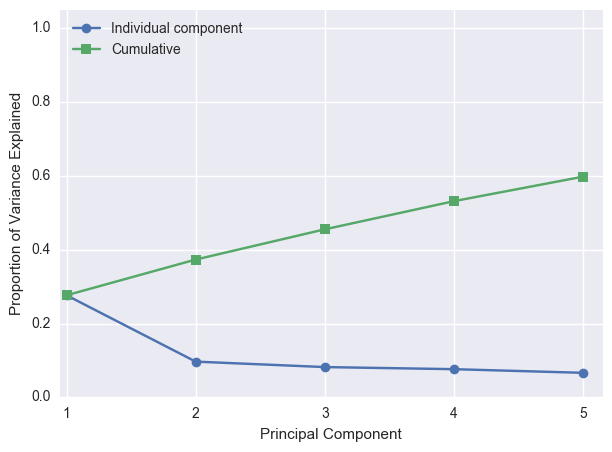

In [88]:
# SCREE plot - PCA1 and PCA2 -- explain 37% of the variance

plt.figure(figsize=(7,5))

plt.plot([1,2,3,4,5], pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1,2,3,4,5], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.95,5.15)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5])
plt.legend(loc=2);

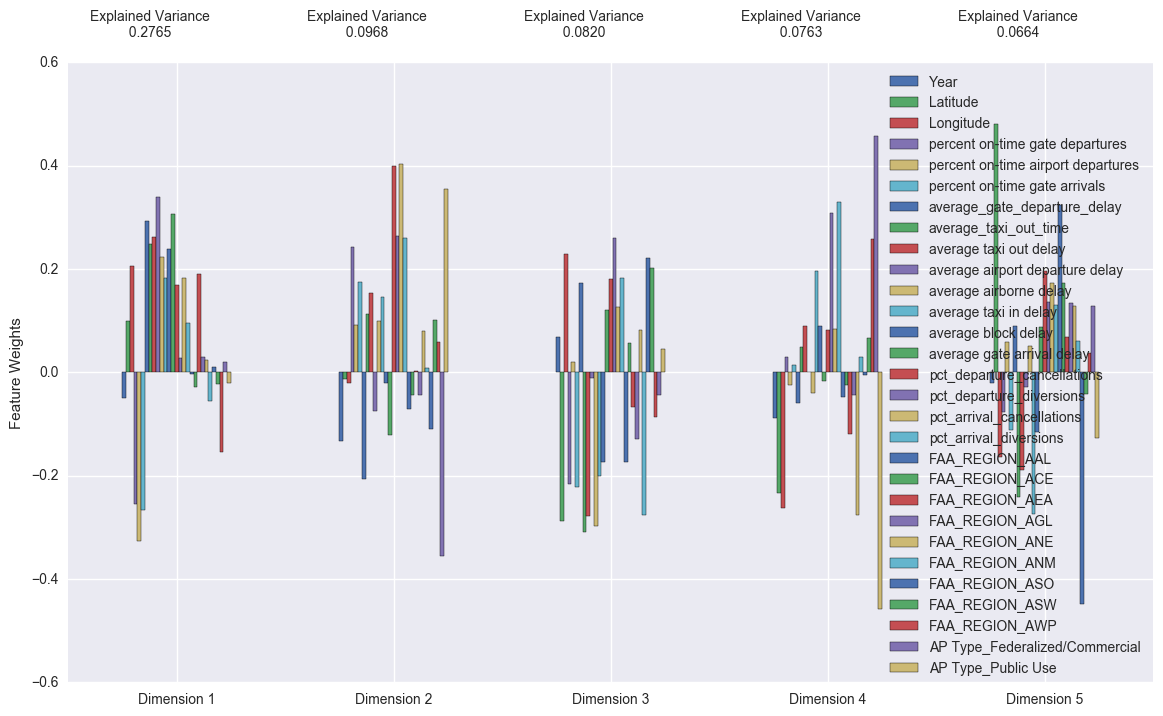

In [64]:
pca_results = rs.pca_results(X, pca)

**These results are not that exciting as pc1 and pc2 only explain ~37% of the dataset variation**

**Will try to improve results by getting rid of dummy columns to reduce dimensionality**

In [65]:
# will also drop 'year' in addition to non-numeric columns

X1 = combined_df.drop(['Year',
                       'Airport',
                       'FAA REGION',
                       'AP Type'],
                       axis=1)

X1.shape

(799, 17)

In [66]:
X1.head(2)

,Latitude,Longitude,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay,pct_departure_cancellations,pct_departure_diversions,pct_arrival_cancellations,pct_arrival_diversions
0,35.040194,-106.609194,0.803,0.7809,0.7921,10.38,9.89,2.43,12.1,2.46,0.83,2.55,10.87,0.004484,0.001316,0.004367,0.000855
1,35.040194,-106.609194,0.814,0.7922,0.8001,9.60,9.79,2.29,11.2,2.26,0.89,2.34,10.24,0.004264,0.001177,0.003663,0.000636


In [67]:
# Running PCA on our revised dataframe

scale1 = StandardScaler()
X1_scaled = scale1.fit_transform(X1)

pca1 = PCA(n_components=5)
pca1.fit_transform(X1_scaled)

array([[ -2.63600345e+00,  -6.88764203e-01,  -7.27168414e-02,
          3.35997928e-02,   1.50422768e-01],
       [ -3.14869922e+00,  -6.77180887e-01,  -2.73163830e-01,
          7.96973668e-02,  -6.06262748e-02],
       [ -2.11997709e+00,  -3.04299775e-03,   7.10127107e-01,
         -2.05850135e-01,   5.07432420e-01],
       ..., 
       [ -3.82181015e+00,   2.74558447e-01,  -2.16325061e-01,
         -4.71756632e-01,   1.26953093e-01],
       [ -2.35477154e+00,   2.64093181e-01,   9.19239020e-01,
         -5.90826431e-01,   3.69499214e-01],
       [ -1.38545688e+00,  -8.01081933e-02,   1.40442059e+00,
         -8.19771663e-01,   7.04864457e-01]])

In [68]:
pca1.explained_variance_ratio_

array([ 0.44199085,  0.14528782,  0.12359231,  0.07010598,  0.05063959])

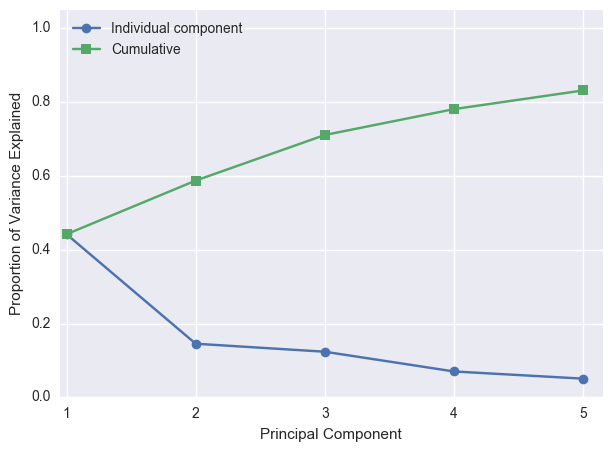

In [82]:
# SCREE plot - PCA1 and PCA2 -- explain 60% of the variance

plt.figure(figsize=(7,5))

plt.plot([1,2,3,4,5], pca1.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1,2,3,4,5], np.cumsum(pca1.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.95,5.15)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5])
plt.legend(loc=2);

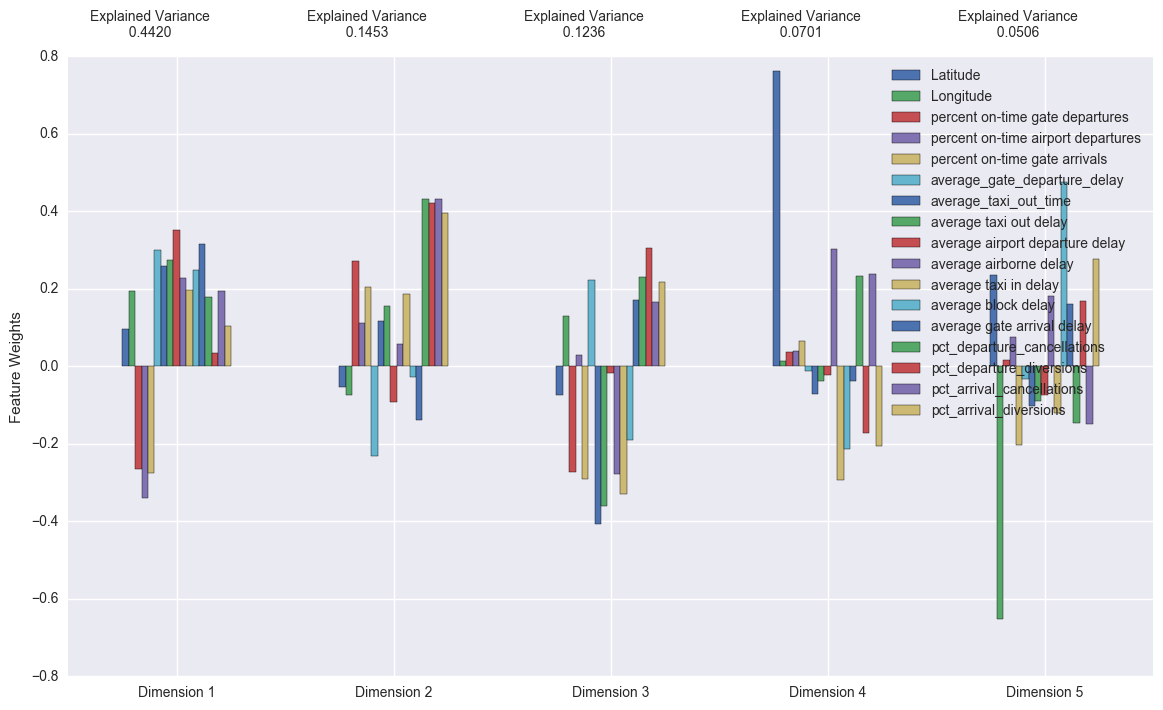

In [71]:
pca1_results = rs.pca_results(X1, pca1)

**Based on above, to reduce dimensionality further, going to drop the `pct_departure_cancellations`, `pct_arrival_cancellations`, `pct_departure_diversions`, `pct_arrival_diversions` because of the overlap with on-time departure and arrival features** 

In [84]:
X2 = X1.drop(['pct_departure_cancellations',
              'pct_arrival_cancellations',
              'pct_departure_diversions',
              'pct_departure_diversions'],
              axis=1)

X2.shape

(799, 14)

In [85]:
# Running PCA on our revised dataframe

scale2 = StandardScaler()
X2_scaled = scale2.fit_transform(X2)

pca2 = PCA(n_components=5)
pca2.fit_transform(X2_scaled)

array([[-2.36628136, -0.29998598, -0.25567933, -0.06179835, -0.11534065],
       [-2.86449551, -0.14057026, -0.30806797, -0.24325172, -0.01373432],
       [-2.01959344, -0.56656308,  0.50541279,  0.9257652 ,  0.04751293],
       ..., 
       [-3.64533011,  0.33683647,  0.36171381, -0.0454569 , -0.10696793],
       [-2.29894435, -0.60973462,  0.2664645 , -0.30860338, -0.49415113],
       [-1.29486848, -1.15108721,  0.73229055,  0.30849747, -0.5442381 ]])

In [86]:
pca2.explained_variance_ratio_

array([ 0.50799516,  0.15566425,  0.08481223,  0.06376564,  0.05871321])

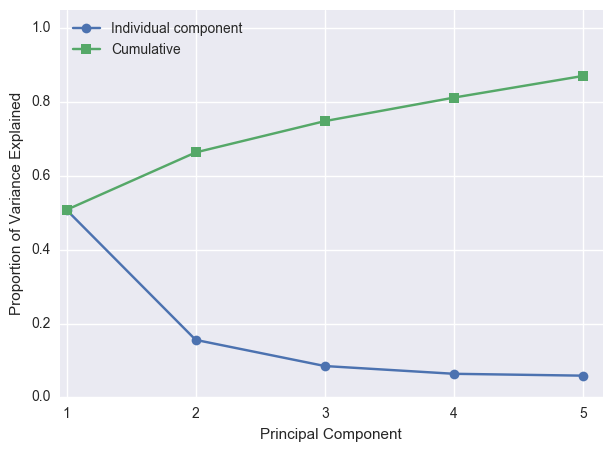

In [87]:
# SCREE plot - PCA1 and PCA2 -- explain 65% of the variance -- slight improvement

plt.figure(figsize=(7,5))

plt.plot([1,2,3,4,5], pca2.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1,2,3,4,5], np.cumsum(pca2.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.95,5.15)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5])
plt.legend(loc=2);

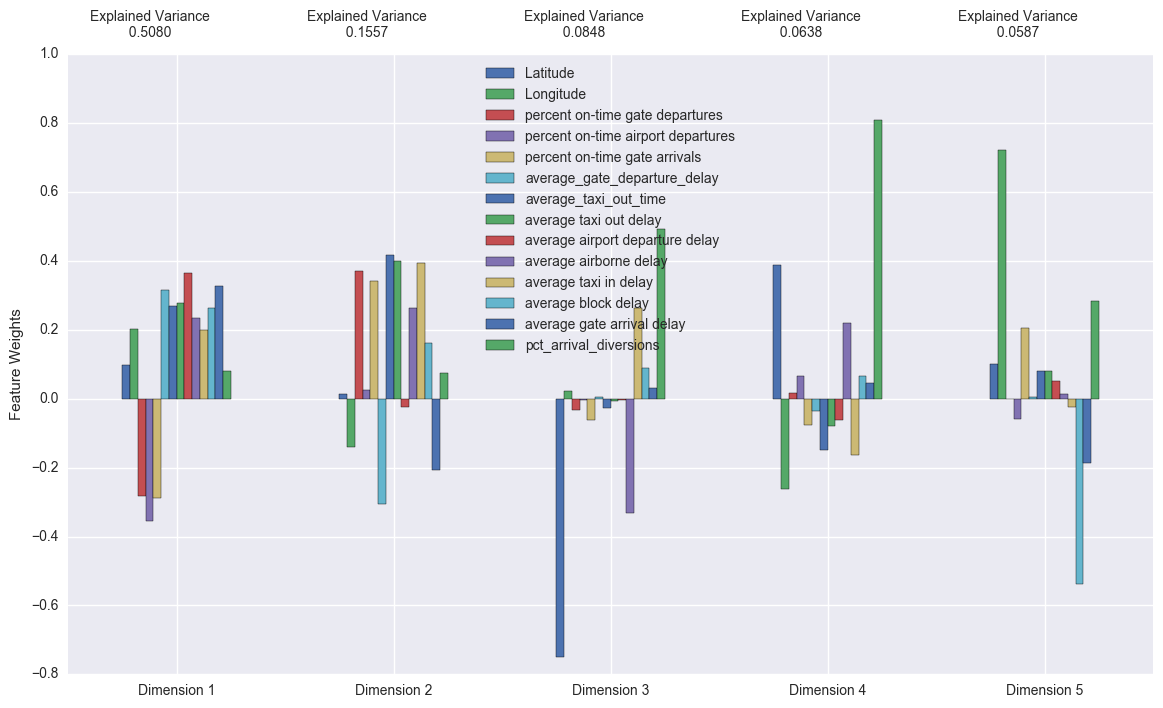

In [89]:
pca2_results = rs.pca_results(X2, pca2)

In [99]:
X2.columns

Index([u'Latitude', u'Longitude', u'percent on-time gate departures',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average taxi out delay', u'average airport departure delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay', u'average gate arrival delay',
       u'pct_arrival_diversions'],
      dtype='object')

### Looking at Clusters

In [90]:
from sklearn import cluster, metrics
kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(X2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [91]:
for ix in range(2,10):
    kmeans = cluster.KMeans(n_clusters=ix)
    kmeans.fit(X1)
    print str(ix), "clusters -->", metrics.silhouette_score(X1, labels=kmeans.labels_, metric='euclidean')

2 clusters --> 0.570299037968
3 clusters --> 0.555574903422
4 clusters --> 0.374276412243
5 clusters --> 0.396228926998
6 clusters --> 0.411684273079
7 clusters --> 0.387243137625
8 clusters --> 0.398575485544
9 clusters --> 0.341906783307


### Analysis of findings 

Removing the dummy variables for FAA Region and Airport Type improved the PCA explained variance ratio for PC1 and PC2 to a respectable 60%